## Tirth Bhatt

### Exploratory Data Analysis - Terrorism

**In this task, we perform Exploratory Data Analysis on Global Terrorism Dataset and as a security/defense analyst, try to find the hotzone of terrorism.** 

In [1]:
#import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#importing the dataset

terrorism_df = pd.read_csv('GlobalTerrorism.csv', encoding="ISO-8859-1")
terrorism_df

C:\Users\Tirth Bhatt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [3]:
#get datatypes of columns and null values

terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


#### Preprocessing/Cleaning

In [4]:
#check for null values

terrorism_df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [5]:
#check for duplicated instances

terrorism_df.duplicated().sum()

0

In [6]:
#remove columns with all null values

terrorism_df.dropna(axis = 1, how = "all")

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [8]:
#rename the columns which aren't labelled properly for convenience

terrorism_df.rename(columns={"iyear" : "Year", "imonth" : "Month", "iday" : "Day", "country_txt" : "Country",
                   "region_txt" : "Region", "provstate" : "State", "latitude" : "Latitude", 
                   "longitude" : "Longitude", "summary" : "Summary", "attacktype1_txt" : "AttackType", 
                   "targtype1_txt" : "TargetType", "gname" : "Group", "weaptype1_txt" : "WeaponType", 
                   "nkill" : "Kills", "nwound" : "Wounded",}, inplace=True)

In [9]:
#keeping only the columns which are relevant for terrorist attacks 

terrorism_df = terrorism_df[["Year", "Month", "Day", "AttackType", "TargetType", "Country", "Region",
         "Latitude", "Longitude", "Summary", "State", "motive", "WeaponType", 
         "Kills", "Wounded", "Group"]]
terrorism_df

,Year,Month,Day,AttackType,TargetType,Country,Region,Latitude,Longitude,Summary,State,motive,WeaponType,Kills,Wounded,Group
0,1970,7,2,Assassination,Private Citizens & Property,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,NaN,NaN,NaN,Unknown,1.0,0.0,MANO-D
1,1970,0,0,Hostage Taking (Kidnapping),Government (Diplomatic),Mexico,North America,19.371887,-99.086624,NaN,Federal,NaN,Unknown,0.0,0.0,23rd of September Communist League
2,1970,1,0,Assassination,Journalists & Media,Philippines,Southeast Asia,15.478598,120.599741,NaN,Tarlac,NaN,Unknown,1.0,0.0,Unknown
3,1970,1,0,Bombing/Explosion,Government (Diplomatic),Greece,Western Europe,37.997490,23.762728,NaN,Attica,NaN,Explosives,NaN,NaN,Unknown
4,1970,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Japan,East Asia,33.580412,130.396361,NaN,Fukouka,NaN,Incendiary,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Armed Assault,Military,Somalia,Sub-Saharan Africa,2.359673,45.385034,12/31/2017: Assailants opened fire on a Somali...,Middle Shebelle,NaN,Firearms,1.0,2.0,Al-Shabaab
181687,2017,12,31,Bombing/Explosion,Military,Syria,Middle East & North Africa,35.407278,35.942679,12/31/2017: Assailants launched mortars at the...,Lattakia,NaN,Explosives,2.0,7.0,Muslim extremists
181688,2017,12,31,Facility/Infrastructure Attack,Private Citizens & Property,Philippines,Southeast Asia,6.900742,124.437908,12/31/2017: Assailants set fire to houses in K...,Maguindanao,NaN,Incendiary,0.0,0.0,Bangsamoro Islamic Freedom Movement (BIFM)
181689,2017,12,31,Bombing/Explosion,Government (General),India,South Asia,24.798346,93.940430,12/31/2017: Assailants threw a grenade at a Fo...,Manipur,NaN,Explosives,0.0,0.0,Unknown


In [10]:
#analyzing the correlation

corr = terrorism_df.corr()
corr

,Year,Month,Day,Latitude,Longitude,Kills,Wounded
Year,1.000000,0.000139,0.018254,0.166933,0.003917,0.015341,0.015273
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003463,0.002938
Day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003693,-0.001268
Latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018124,0.015988
Longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000562,0.000223
Kills,0.015341,0.003463,-0.003693,-0.018124,-0.000562,1.000000,0.534375
Wounded,0.015273,0.002938,-0.001268,0.015988,0.000223,0.534375,1.000000


<AxesSubplot:>

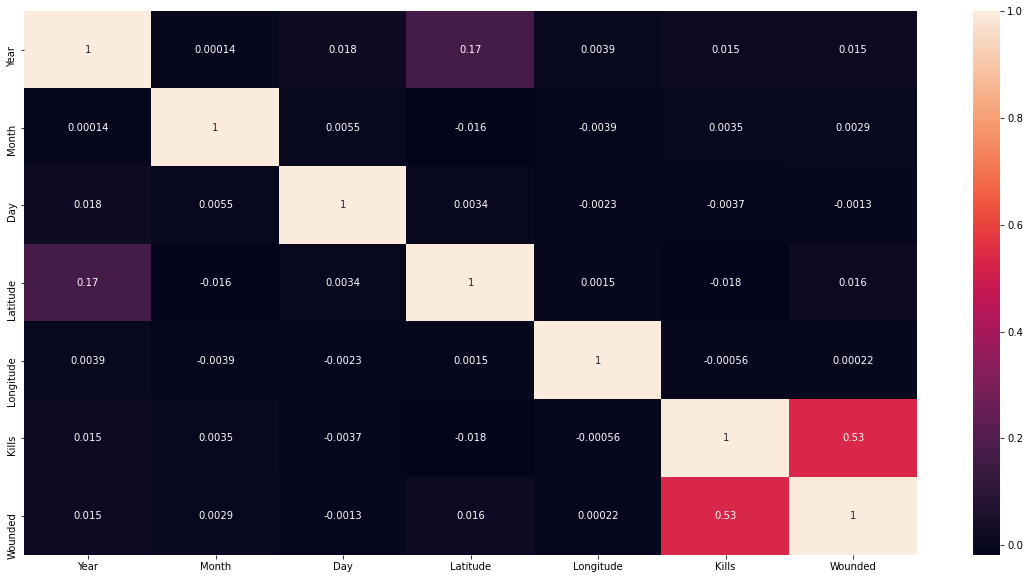

In [11]:
#visualize correlation with heatmap

plt.figure(figsize = (20,10))
sns.heatmap(corr, annot = True)

### Exploratory Data Analysis

**Year with the most terrorist attacks**


In [13]:
print("Year with the most terrorist attacks :", terrorism_df["Year"].value_counts().idxmax())

Year with the most terrorist attacks : 2014


**Month with the most terrorist attacks**


In [14]:
import calendar
print("Month with the most terrorist attacks :", calendar.month_name[terrorism_df["Month"].value_counts().idxmax()])

Month with the most terrorist attacks : May


**Most terrorist attack type**

In [16]:
print("Most terrorist attack type :", terrorism_df["AttackType"].value_counts().idxmax())

Most terrorist attack type : Bombing/Explosion


**Country with the highest terrorist attacks**

In [18]:
print("Country with the highest terrorist attacks :", terrorism_df["Country"].value_counts().idxmax())

Country with the highest terrorist attacks : Iraq


**Region with the highest terrorist attacks**

In [19]:
print("Region with the highest terrorist attacks :", terrorism_df["Region"].value_counts().idxmax())

Region with the highest terrorist attacks : Middle East & North Africa


**Group involved in most terrorist attacks**

In [20]:
print("Group involved in most terrorist attacks :", terrorism_df["Group"].value_counts().idxmax())

Group involved in most terrorist attacks : Unknown


**Due to 'null' being the highest number of values, idxmax returns unknown. Hence, we move to the next index.**

In [21]:
print("Group involved in most terrorist attacks :", terrorism_df["Group"].value_counts().index[1])

Group involved in most terrorist attacks : Taliban


### Visualizing Various Attacking Methods

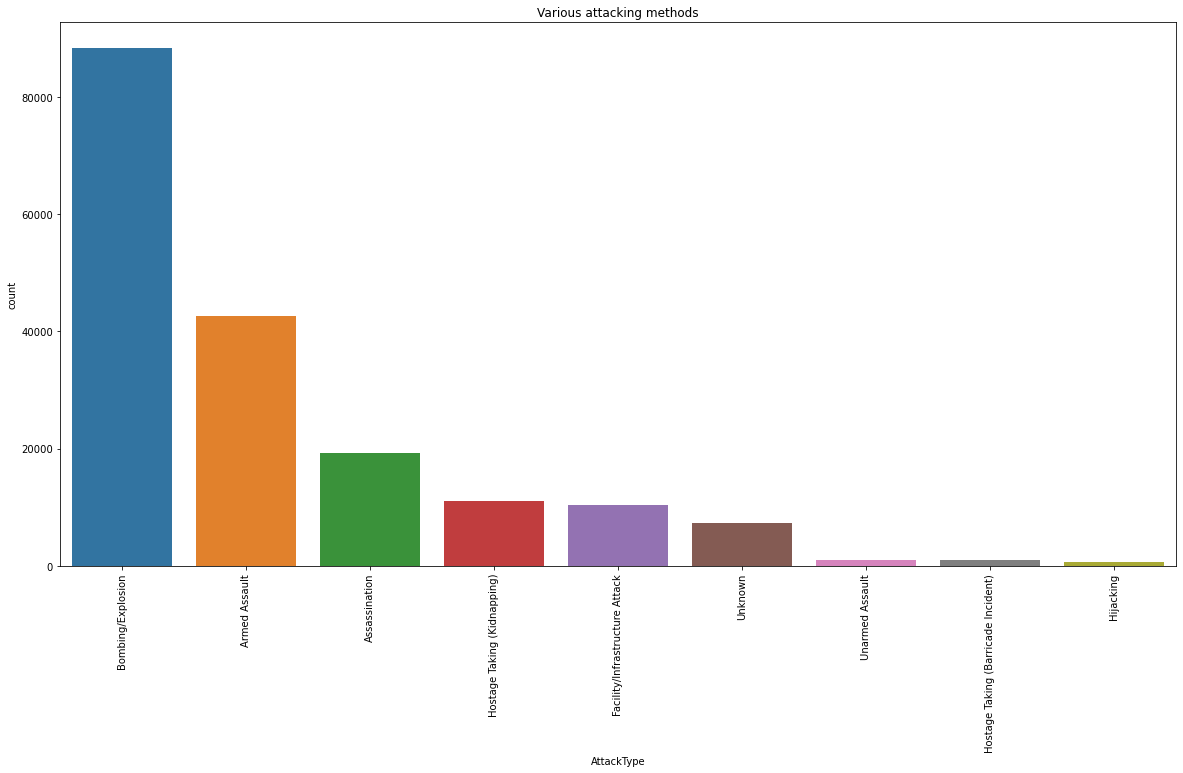

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(x="AttackType", data=terrorism_df, order = terrorism_df["AttackType"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Various attacking methods")
plt.show()

### Visualizing Major Terrorist Targets

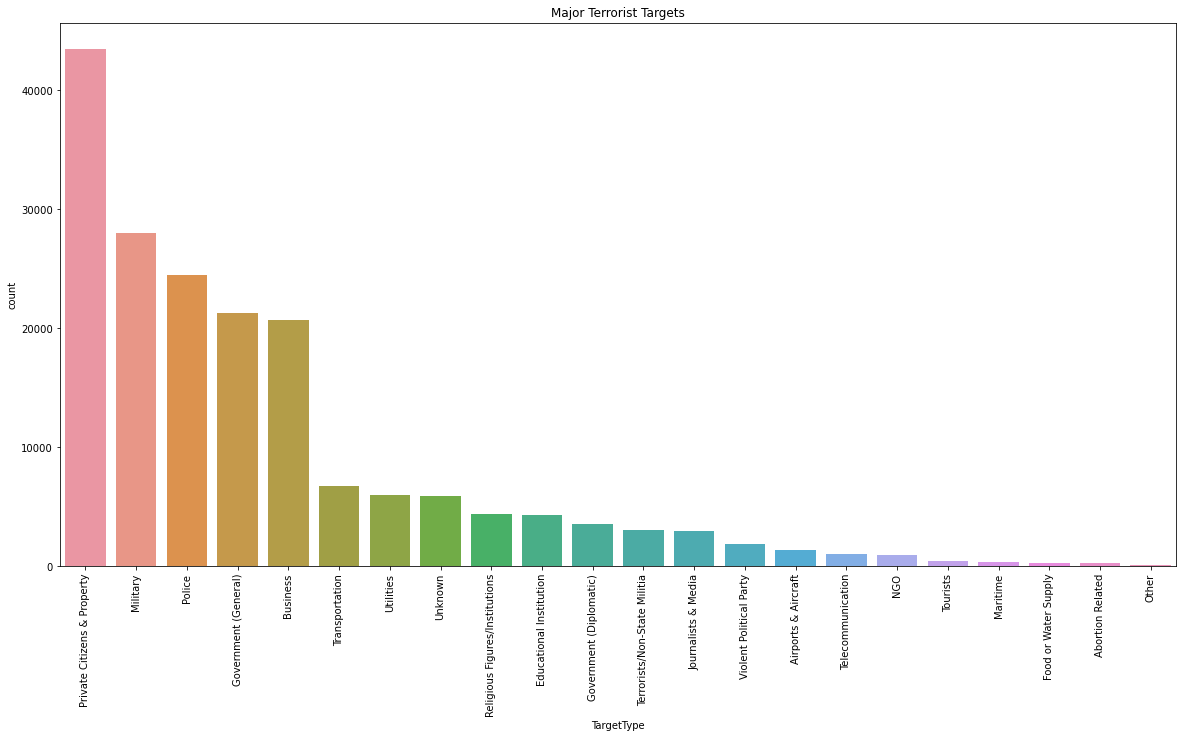

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(x="TargetType", data=terrorism_df, order = terrorism_df["TargetType"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Major Terrorist Targets")
plt.show()

### Regions Most Affected by Terrorism

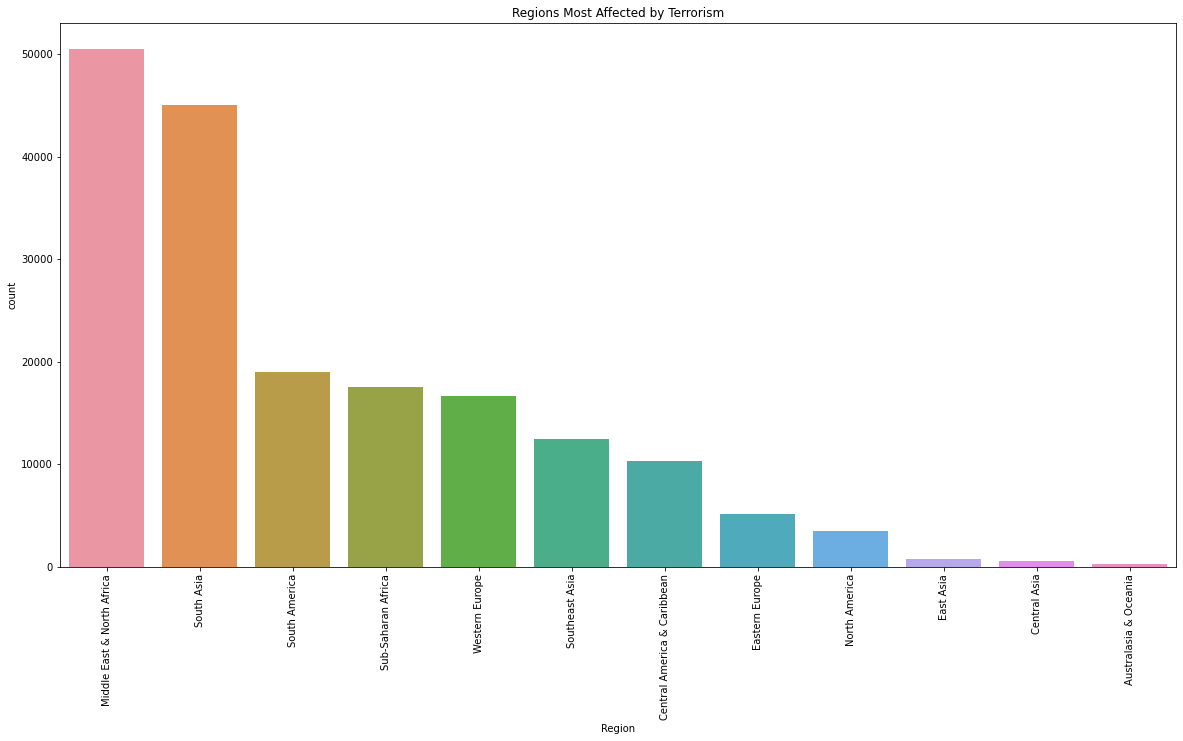

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(x="Region", data=terrorism_df, order = terrorism_df["Region"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Regions Most Affected by Terrorism")
plt.show()

### Countries Most affected by Terrorism

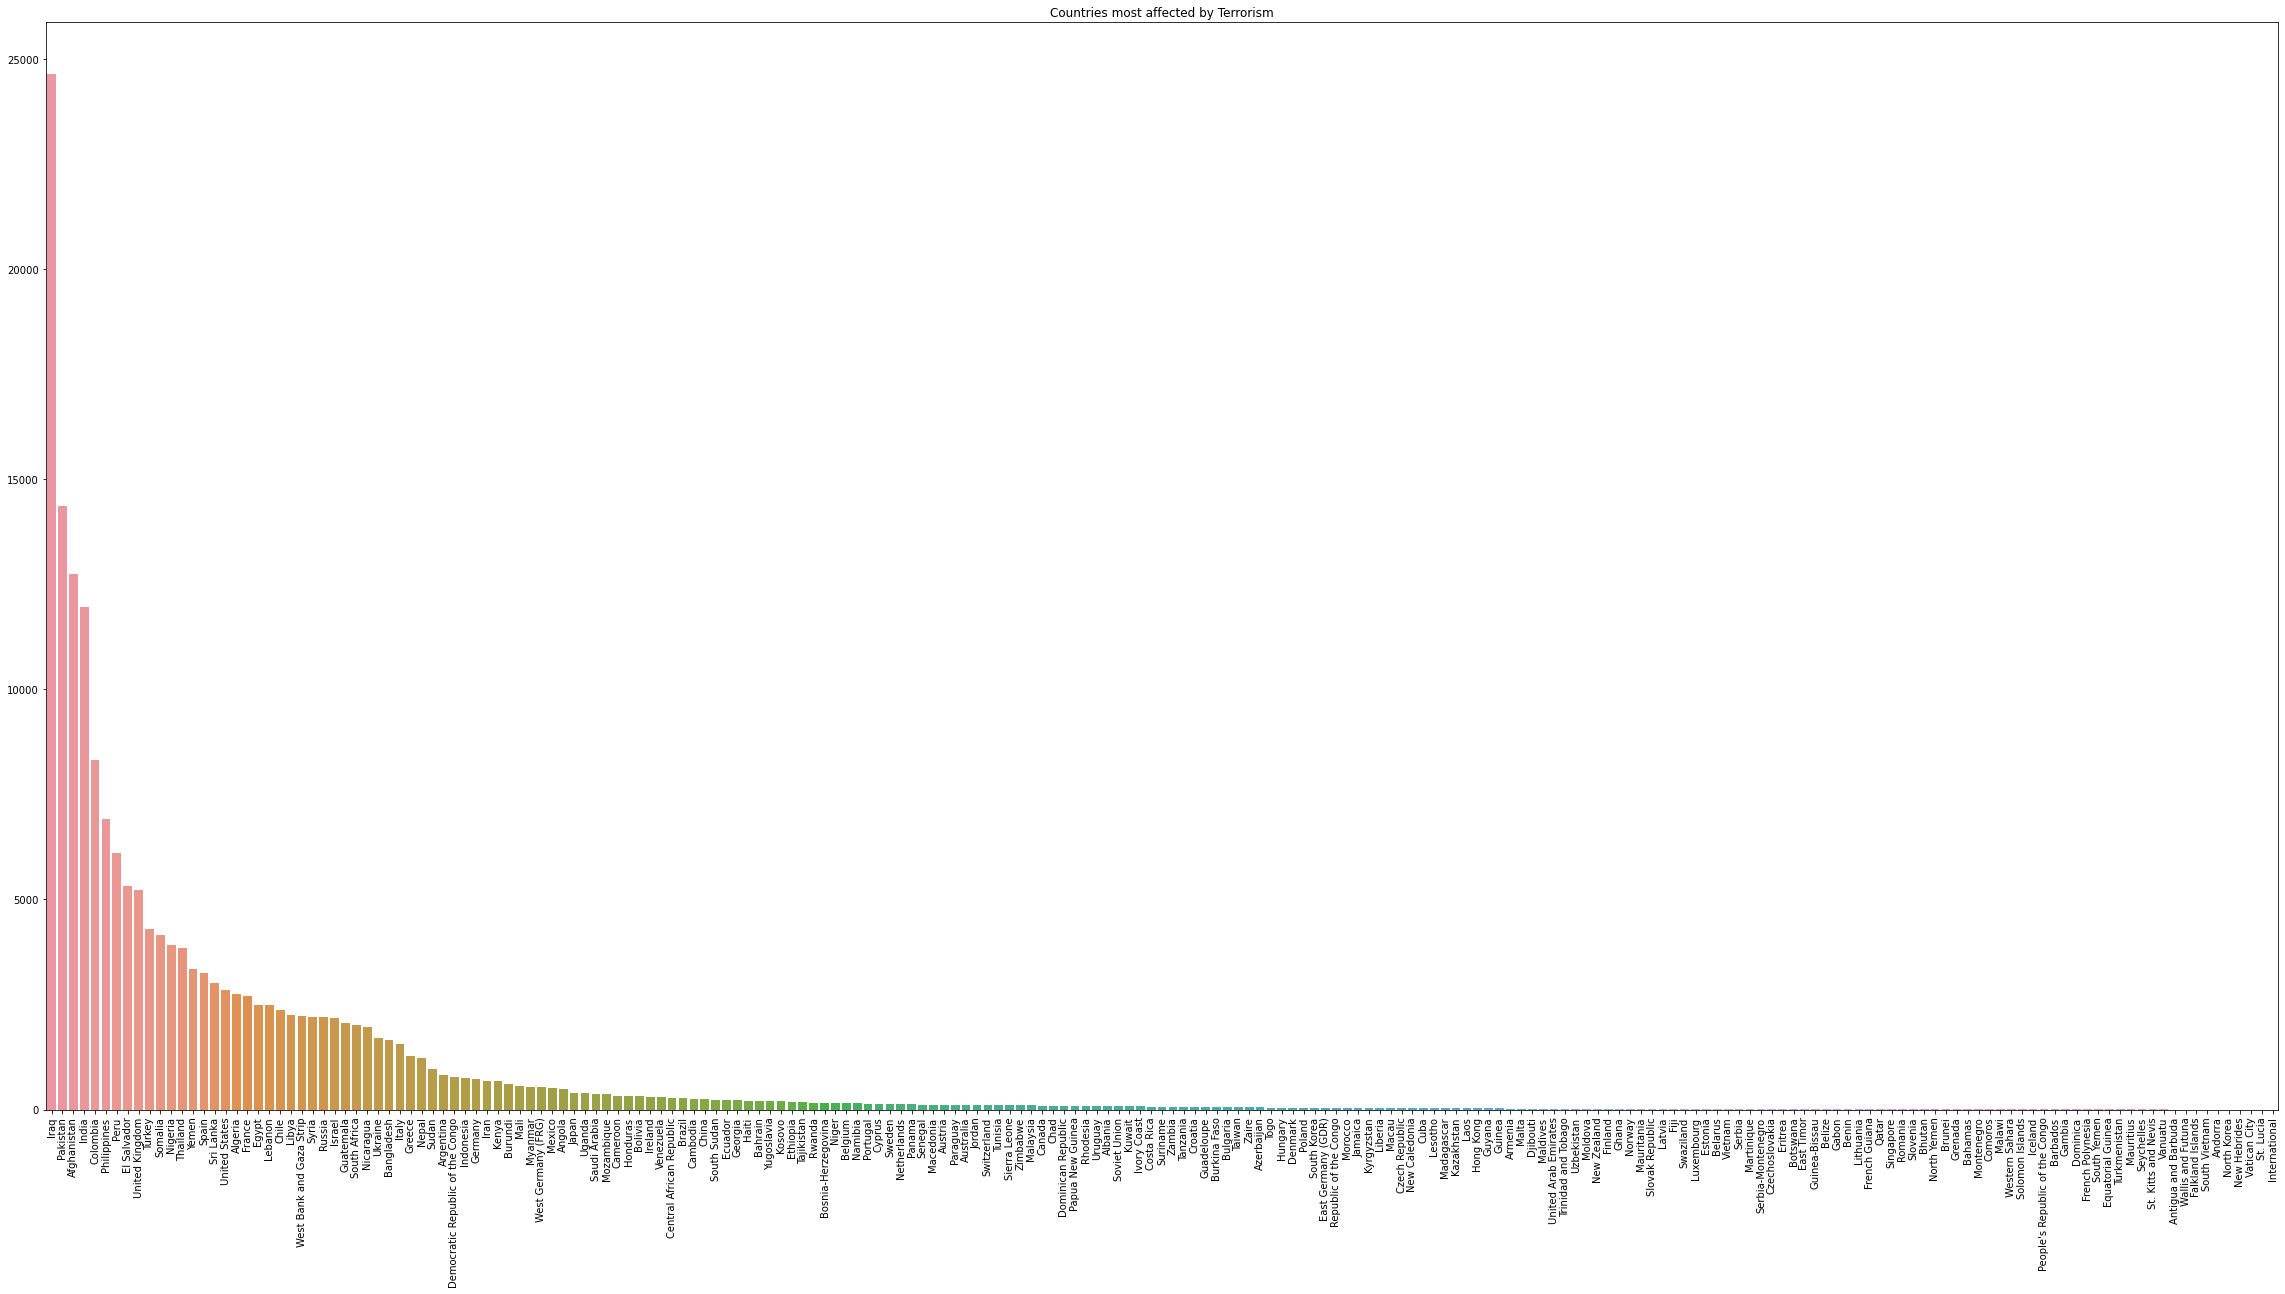

In [26]:
plt.figure(figsize=(40,20))

x=terrorism_df["Country"].value_counts().index
y=terrorism_df["Country"].value_counts().values
sns.barplot(x = x, y = y)
plt.title("Countries most affected by Terrorism")
plt.xticks(rotation = 90)
plt.show()

**Since the plot is not visible, we visualize for top 20 countries**

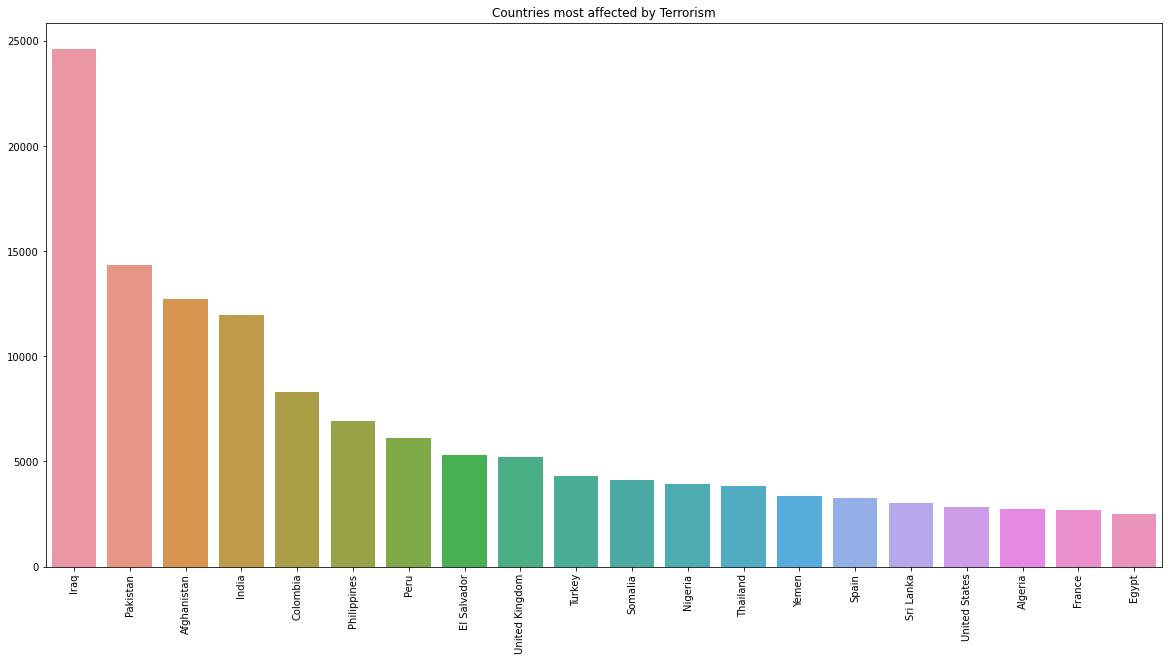

In [27]:
plt.figure(figsize=(20,10))
x=terrorism_df["Country"].value_counts()[:20].index
y=terrorism_df["Country"].value_counts()[:20].values
sns.barplot(x = x, y = y)
plt.title("Countries most affected by Terrorism")
plt.xticks(rotation = 90)
plt.show()

### Number of Casualties in Terrorist Attacks by Country

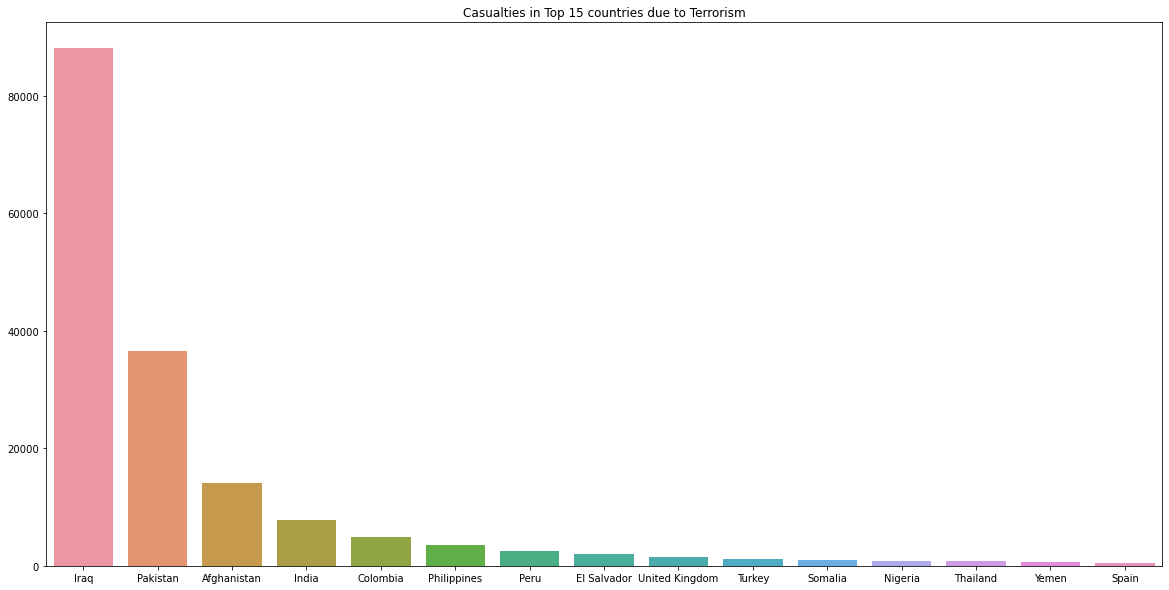

In [29]:
plt.figure(figsize=(20,10))

x=terrorism_df["Country"].value_counts()[:15].index
y=terrorism_df["Kills"].value_counts()[:15].values
sns.barplot(x = x, y = y)
plt.title("Casualties in Top 15 countries due to Terrorism")
plt.show()

### Number of Terrorist Attacks per Year

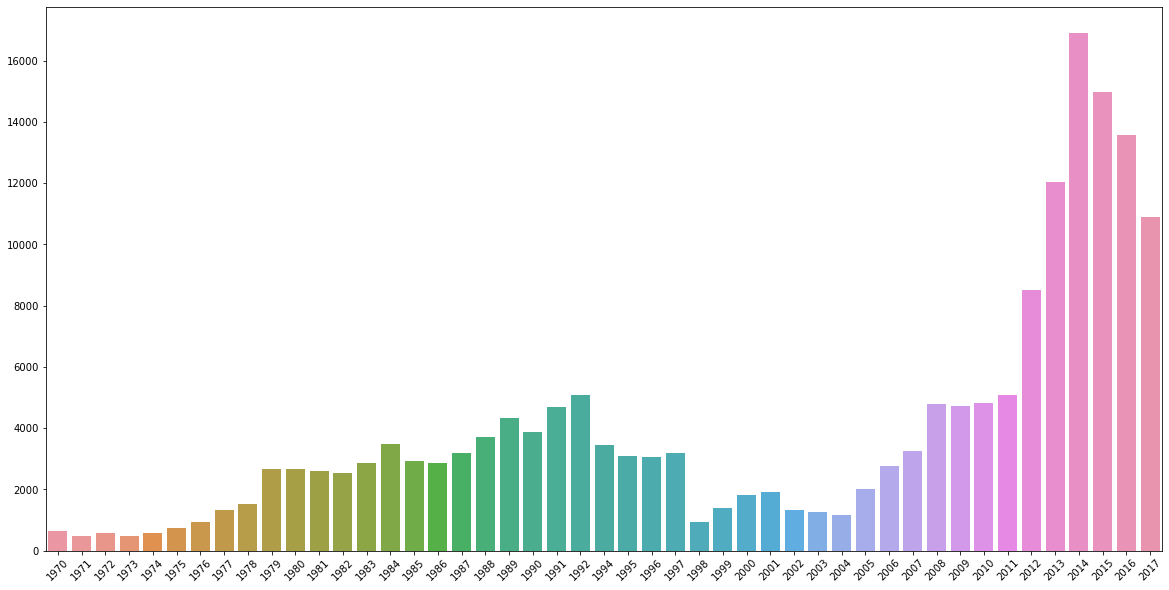

In [30]:
plt.figure(figsize=(20,10))

x=terrorism_df["Year"].value_counts().index
y=terrorism_df["Year"].value_counts().values
sns.barplot(x = x, y = y)
plt.xticks(rotation = 45)
plt.show()

### CONCLUSIONS:

#### 1. Most Terrorist Attack Types: Bombing/Explosion
#### 2. Country with most terrorist attacks: Iraq
#### 3. Region with most terrorist attacks: Middle East and North Africa
#### 4. Group involved in most terrorist attacks: Taliban
#### 5. In the last plot it can be clearly seen that the number of terrorist attacks have declined considerably since 2014

### THANK YOU!